#   Sharks databe cleaning


Here is where I am going to try to clean all de data from the attack.csv downloaded from https://www.kaggle.com/teajay/global-shark-attacks/data

## First step. Import the dependencies. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Second. The path to the Data

In [2]:
df = pd.read_csv('../attacks.csv', encoding='latin-1')

# This code must be conveninetly addapted to each file need to use.

## The data: First impresion. Shape, Columns. Few rows. 

In [3]:


print(df.shape)
print(df.columns)
df.head()

# Note. This could be checked in directly in Kaggle. 

(25723, 24)
Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
for col, numnulls in df.isnull().sum().items():
    if numnulls > 0:
        print(f"{col} {numnulls}")

Case Number 17021
Date 19421
Year 19423
Type 19425
Country 19471
Area 19876
Location 19961
Activity 19965
Name 19631
Sex  19986
Age 22252
Injury 19449
Fatal (Y/N) 19960
Time 22775
Species  22259
Investigator or Source 19438
pdf 19421
href formula 19422
href 19421
Case Number.1 19421
Case Number.2 19421
original order 19414
Unnamed: 22 25722
Unnamed: 23 25721


In [5]:
df = df.drop_duplicates()
# to know duplicates and drop them
#OJO se han quitado algunos duplicados y todoso los que estaban vacios, como 20.000)

In [6]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
for col, numnulls in df.isnull().sum().items():
    if numnulls > 0:
        print(f"{col} {numnulls}")
        
# Ojo, diferencia de los nulos arriba y aqui

Case Number 2
Date 10
Year 12
Type 14
Country 60
Area 465
Location 550
Activity 554
Name 220
Sex  575
Age 2841
Injury 38
Fatal (Y/N) 549
Time 3364
Species  2848
Investigator or Source 27
pdf 10
href formula 11
href 10
Case Number.1 10
Case Number.2 10
original order 3
Unnamed: 22 6311
Unnamed: 23 6310


## The function describe give us the first idea about the table

In [8]:
df.describe(include='all')


#This does not give us so much information because of the null and empty data inside. 

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
count,6310,6302,6300.000000,6298,6252,5847,5762,5758,6092,5737,...,3464,6285,6302,6301,6302,6302,6302,6309.000000,1,2
unique,6287,5433,NaN,8,212,825,4108,1532,5230,6,...,1549,4969,6291,6290,6285,6285,6286,NaN,1,2
top,0,1957,NaN,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,White shark,"C. Moore, GSAF",1907.10.16.R-HongKong.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.08.02,2014.08.02,NaN,stopped here,change filename
freq,8,11,NaN,4595,2229,1037,163,971,550,5094,...,163,105,2,2,4,2,2,NaN,1,1
mean,NaN,NaN,1927.272381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3155.999683,NaN,NaN
std,NaN,NaN,281.116308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1821.396206,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN
25%,NaN,NaN,1942.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1579.000000,NaN,NaN
50%,NaN,NaN,1977.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3156.000000,NaN,NaN
75%,NaN,NaN,2005.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4733.000000,NaN,NaN


In [7]:
df.describe().T
#(De los apuntes de Marc. No se que valores esta cogiendo)

,count,mean,std,min,25%,50%,75%,max
Year,6300.0,1927.272381,281.116308,0.0,1942.0,1977.0,2005.0,2018.0
original order,6309.0,3155.999683,1821.396206,2.0,1579.0,3156.0,4733.0,6310.0


## There are a few columns that seem to be empty or with non usefull data.
## Let's find them and get rid of them. 

In [8]:
df.isnull().sum().sort_values(ascending=False).head(20)

Unnamed: 22               25722
Unnamed: 23               25721
Time                      22775
Species                   22259
Age                       22252
Sex                       19986
Activity                  19965
Location                  19961
Fatal (Y/N)               19960
Area                      19876
Name                      19631
Country                   19471
Injury                    19449
Investigator or Source    19438
Type                      19425
Year                      19423
href formula              19422
pdf                       19421
href                      19421
Case Number.1             19421
dtype: int64

In [9]:
print(df["Unnamed: 22"].value_counts())
print(df["Unnamed: 23"].value_counts())


stopped here    1
Name: Unnamed: 22, dtype: int64
change filename    1
Teramo             1
Name: Unnamed: 23, dtype: int64


## The last two columns are empty so we drop them

In [10]:
df = df.drop(columns=["Unnamed: 22", "Unnamed: 23"])
## df.drop(columns=['B', 'C'])

## There are some columns with data that is not usefull for our investigation, 
## so we are going to drop that columns as well.


In [11]:
df = df.drop(columns=["pdf", "Investigator or Source","href formula", "href","Date", "Type", "Area", "Name", "Age", "Case Number.2", "original order", "Case Number", "Location", "Case Number.1", "Time"])

In [12]:
df

,Year,Country,Activity,Sex,Injury,Fatal (Y/N),Species,Case Number.1
0,2018.0,USA,Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,White shark,2018.06.25
1,2018.0,USA,Standing,F,Minor injury to left thigh,N,NaN,2018.06.18
2,2018.0,USA,Surfing,M,Injury to left lower leg from surfboard skeg,N,NaN,2018.06.09
3,2018.0,AUSTRALIA,Surfing,M,Minor injury to lower leg,N,2 m shark,2018.06.08
4,2018.0,MEXICO,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",2018.06.04
...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.Country.value_counts()

USA                  2229
AUSTRALIA            1338
SOUTH AFRICA          579
PAPUA NEW GUINEA      134
NEW ZEALAND           128
                     ... 
ADMIRALTY ISLANDS       1
OCEAN                   1
CYPRUS                  1
IRELAND                 1
WESTERN SAMOA           1
Name: Country, Length: 212, dtype: int64

## Lets see what we have now

In [14]:
df.describe(include='all')

,Year,Country,Activity,Sex,Injury,Fatal (Y/N),Species,Case Number.1
count,6300.000000,6252,5758,5737,6274,5763,3464,6302
unique,NaN,212,1532,6,3737,8,1549,6285
top,NaN,USA,Surfing,M,FATAL,N,White shark,1962.06.11.b
freq,NaN,2229,971,5094,802,4293,163,2
mean,1927.272381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,281.116308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1942.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1977.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2005.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:


# Ordena las columnas alfabéticamente
#df = df[sorted(df.columns)]
#df


## We can see so many rows with empty values. We should clen them

In [16]:
### para borrar las rows que no tienen valores (no funciona??)
#df.dropna(how='all')
#df

In [17]:
### Drop

In [15]:
df = df.dropna(how='any', subset=["Country", 'Year'])

In [16]:


df.isnull().sum()



Year                0
Country             0
Activity          537
Sex               561
Injury             26
Fatal (Y/N)       533
Species          2799
Case Number.1       0
dtype: int64

In [20]:
df.describe(include='all')

,Date,Year,Type,Country,Area,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Species
count,6250,6250.000000,6246,6250,5830,5713,6044,5689,3461,6224,5717,3451
unique,5393,NaN,8,212,815,1513,5194,6,157,3721,8,1548
top,1957,NaN,Unprovoked,USA,Florida,Surfing,male,M,17,FATAL,N,White shark
freq,11,NaN,4561,2229,1037,970,542,5050,154,780,4274,163
mean,NaN,1929.012000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,276.886786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1942.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1978.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2005.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


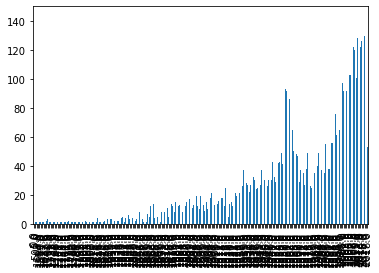

In [17]:


%matplotlib inline
df.Year.value_counts().sort_index().plot.bar()



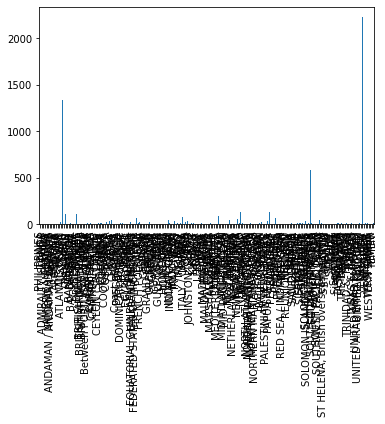

In [22]:
%matplotlib inline
df.Country.value_counts().sort_index().plot.bar()

In [23]:
#Claramente hay demasiados anos y demasiados paises. Podemos dejarlos en los ultimos 50 y y 50.

# Vamos a buscar si hay mas tontos que muetos por tiburones


In [20]:
# Miramos que valores hay en anos
df.Year.value_counts()

2015.0    143
2017.0    135
2016.0    130
2011.0    128
2014.0    126
         ... 
1802.0      1
1637.0      1
1805.0      1
1753.0      1
1786.0      1
Name: Year, Length: 241, dtype: int64

In [23]:
df

,Year,Country,Activity,Sex,Injury,Fatal (Y/N),Species,Case Number.1
0,2018.0,USA,Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,White shark,2018.06.25
1,2018.0,USA,Standing,F,Minor injury to left thigh,N,NaN,2018.06.18
2,2018.0,USA,Surfing,M,Injury to left lower leg from surfboard skeg,N,NaN,2018.06.09
3,2018.0,AUSTRALIA,Surfing,M,Minor injury to lower leg,N,2 m shark,2018.06.08
4,2018.0,MEXICO,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",2018.06.04
...,...,...,...,...,...,...,...,...
6297,0.0,AUSTRALIA,Diving,M,FATAL,Y,NaN,ND.0005
6298,0.0,AUSTRALIA,Pearl diving,M,FATAL,Y,NaN,ND.0004
6299,0.0,USA,Swimming,M,FATAL,Y,NaN,ND.0003
6300,0.0,PANAMA,NaN,M,FATAL,Y,NaN,ND.0002


In [51]:
dfstupid

,Year,Country,Sex,Injury,Fatal (Y/N),Species
0,2018.0,USA,F,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,2018.0,USA,F,Minor injury to left thigh,N,NaN
2,2018.0,USA,M,Injury to left lower leg from surfboard skeg,N,NaN
3,2018.0,AUSTRALIA,M,Minor injury to lower leg,N,2 m shark
4,2018.0,MEXICO,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"
...,...,...,...,...,...,...
6297,0.0,AUSTRALIA,M,FATAL,Y,NaN
6298,0.0,AUSTRALIA,M,FATAL,Y,NaN
6299,0.0,USA,M,FATAL,Y,NaN
6300,0.0,PANAMA,M,FATAL,Y,NaN


In [24]:
### df.trany.value_counts() para ver los distintos valores que tiene una columna

In [25]:
vaciar la tabla de  las filas que no tengan datos que nos den alguna informacion
vaciar la tabla de columnas que no nos aporten nada.
De las columnas que tengan los datos mal, reordenarlos y ponerlos para que sean utiles. 


cuestiones a aclarar. 
Es mas peligroso ser gilipollas con un camara de fotos que un tiburon.
muertes por camara de fotos https://www.bbc.com/news/newsbeat-45745982
    
    
Comparar los ataques por paises y anos
Aumento desde la apariciond del surf
Paises por kms de costa


Replantear Describe y plantear hipotesis.
Buscar la informacion necesaria para comprobar si la hipotesis es correcta. 
Muertes de hombres y mujeres por anos (previsible crecimiento exponencial)
Muertes de hombres y mujeres por paises (menos muertes en paises menos machistas)
Anadir datos de kms de costa? 

SyntaxError: invalid syntax (<ipython-input-25-f897c046fcea>, line 1)